In [1]:
# Libraries used:
import rebound
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import *
import os
from IPython.display import display, clear_output
from ipywidgets import IntProgress
from IPython.display import display
import time
import pandas as pd

# Algunas configuraciones generales:
plt.style.use('seaborn-whitegrid')
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 19
# mpl.rcParams['lines.linewidth'] = 11
# mpl.rcParams['lines.markersize'] = 11

In [2]:
# Kp:K resonance?
Kp = 1
K  = 1
RESO = str(Kp) + '-' + str(K) # String "Kp-K"

# perturber eccentricity ep?
ep = 0.6
ep_text = "{0:.1g}".format(ep) # .1g implies consider 1 significative digit for ep.

# In the next cell are the initial conditions of the system

# MODES OF OPERATION (inidicated with flag MODO):
# MODO = 0 means perform integration with Rebound.
# MODO = 1 means load an integration from file.
MODO = 0

# Integration setup (only for MODO = 0):
Ttot  = 1e6   # total int. time
d_out = 1e3    # output step
m0    = 1     # primary mass (fixed)

# OTHER SETUP:
# If ANGLE = 0 => The angles: (0, 360). If ANGLE = 1 => The angles: (-180,180). 
ANGLE = 0
# Load numerical integration to compare it with model in other notebook?
COMPARAR = True
# Save integration data and plots (MODO = 1 only can save plots)
SAVE_data = False
SAVE_plot = False

# Directory and file names:
COMUN = "/home/juan/Escritorio/TESIS/"  # Common path
dir_data = COMUN + "PROGRAMAS/REBOUND/Restricto/"+RESO+"/ep="+ep_text+"/"
dir_plot = dir_data
file_data1 = "particula.txt"
file_data2 = "planeta.txt"

# Image format and quality (in dpi)
formato = "jpg"
cal     = 100
file_plot1 = "particula" +"."+ formato
file_plot2 = "planeta" +"."+ formato
file_plot3 = "otros" +"."+ formato

In [3]:
# PLANETARY INITIAL CONDITIONS
# This notebook was designed to perform numerical integrations of resonant planet + particle systems
# and compare the results with the H-surface model (Pons & Gallardo 2022) but it can be used 
# with general purpose changing all initial elements manually at the end of this cell.
# The initial elements are: a1i, e1i, w1i (long. of peri.), l1i (mean long.), a2i, e2i, w2i, l2i. 

# Planet = p ; Particle = nothing
mp = 0.0001 # fixed

# INITIAL CONDITIONS SET UP:

# Planet
api = 5.2
epi = ep
wpi = 0.0 # fixed
lpi = 0.0 # fixed

# Particle 
ai = api*(((K/Kp)**2)*((m0)/(m0+mp)))**(1/3) # a is defined by resonance and masses
print(ai)
#ai = 3.96808 # ai forced
#ei = 0.7
#ei = 0.66
ei = 0.4
#wi = 138.0
#wi = 82.0
wi = 296.0

# Uso anomalía media
#Mi = 49.75 
#Mi = 354.5
Mi = 357.5

# decide which resonant angle to use
#thetai = 0.0
#sigmai = 180.0
#si = sigmai
#l1i = (thetai + K2*l2i)/K1
#li = (sigmai + K2*l2i - (K2-K1)*w1i)/K1
#li = 0.0

# e1i,w1i and s1i (thetai or sigmai) defines name of folder to load/save data
caso_str = 'e=%.2f_w=%.0f_M=%.0f' % (ei,wi,Mi)

dir_data = dir_data + caso_str + "/"
dir_plot = dir_plot + caso_str + "/"

# print("Intitial conditions are (a, e, varpi, M):")
# print("Particle:            ", round(ai,4), round(ei,3), " ", wi, " ", Mi)
# print("Planet:              ", round(api,4), "   ", round(epi,3), " ", wpi, " ", Mpi) 

5.199826678221324


In [4]:
# CONFIGURACÓN DE LA SIMULACIÓN

if (MODO == 0):
    # Creo sim
    sim = rebound.Simulation()

    # Eligo algoritmo de integración:
    # sim.integrator = "whfast"
    sim.integrator = "mercurius" 
    sim.ri_mercurius.hillfac = 4. # Hill radius for mercurius

    # Eligo el sistema de ref.:
    # sim.ri_whfast.coordinates = 'jacobi' #default
    # sim.ri_whfast.coordinates = 'democraticheliocentric' # ~ Poincare
    # sim.ri_whfast.coordinates = 'whds'
    sim.ri_mercurius.coordinates = 'democraticheliocentric'

    # Defino unidades y paso del tiempo:
    sim.units = ('yrs', 'AU', 'Msun')
    dT    = 0.01  # paso de la int.
    Nout  = int(Ttot/d_out) # puntos en la salida
    #sim.t = Ttot
    sim.dt = dT

    # Mejorar performance y accuaracy:
    # sim.ri_whfast.safe_mode = 0
    # sim.ri_whfast.corrector = 11 # Solo en Jacobi

    KG2 = sqrt(sim.G)
    #print(KG2)
    G2R = pi/180
    R2G = 180/pi

    # DEFINO OBJETOS:
    star = sim.add(m=m0)            
    par = sim.add(m=0, a=ai, e=ei, inc=0*G2R, pomega=wi*G2R, Omega=0*G2R, M=Mi*G2R)
    pla = sim.add(m=mp, a=api, e=epi, inc=0*G2R, pomega=wpi*G2R, Omega=0*G2R, l=lpi*G2R)

    # Move to heliocentric reference:
    sim.move_to_hel()
    
    particles = sim.particles

    sim.status()

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Mar  9 2022 12:07:46
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.010000
---------------------------------
<rebound.particle.Particle object at 0x7f795b989740, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7f795b989e40, m=0.0 x=1.050613652673072 y=-2.9435106276983207 z=0.0 vx=3.9122190006323736 vy=1.5377507345450967 vz=0.0>
<rebound.particle.Particle object at 0x7f795b989740, m=0.0001 x=2.08 y=0.0 z=0.0 vx=0.0 vy=5.510889507568359 vz=0.0>
---------------------------------


In [5]:
# INTEGRACIÓN NUMÉRICA:

# Integro con REBOUND
if (MODO == 0):   
    # Inicializo variables:
    times = np.linspace(0, Ttot, Nout)
    t = times
    tp = times
    a  = np.zeros(Nout)
    e  = np.zeros(Nout)
    w  = np.zeros(Nout)
    l  = np.zeros(Nout)
    ap = np.zeros(Nout)
    ep = np.zeros(Nout)
    wp = np.zeros(Nout)
    lp = np.zeros(Nout)

    # Barra para indicar el progreso:
    print('Progress:')
    barra = IntProgress(min=0, max=Nout) # instantiate the bar
    display(barra) # display the bar

    # Integro en pasos (Ttot/Nout) y voy guardando elementos:
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        a[i]  = particles[1].a
        e[i]  = particles[1].e
        w[i]  = (particles[1].pomega)*R2G % 360
        l[i]  = (particles[1].l)*R2G % 360
        ap[i] = particles[2].a
        ep[i] = particles[2].e
        wp[i] = (particles[2].pomega)*R2G % 360
        lp[i] = (particles[2].l)*R2G % 360
        barra.value += 1 # signal to increment the progress bar

    sim.status()

# Cargo integración desde archivo:
if (MODO == 1):
    # Son 2 dataframe, uno para c/planeta
    Dint = pd.read_csv(dir_data + file_data1, delimiter=r"\s+")
    Dintp = pd.read_csv(dir_data + file_data2, delimiter=r"\s+")
    # particle:
    t  = Dint['t'].values
    a  = Dint['a1'].values
    e  = Dint['e1'].values
    w  = Dint['w1'].values
    l  = Dint['lambda1'].values
    # planet:
    tp = Dintp['t'].values
    ap = Dintp['a2'].values
    ep = Dintp['e2'].values
    wp = Dintp['w2'].values
    lp = Dintp['lambda2'].values
        
# Otras cantidades de interés:
deltaW = (w-wp) % 360
theta = (K*l-Kp*lp) % 360
s  = (theta + (Kp-K)*w) % 360
sp = (theta + (Kp-K)*wp) % 360
ds = (theta + (Kp-K)*deltaW) % 360

# Acomodo ángulos:
w  = w % 360
wp = wp % 360
l  =  l % 360
lp = lp % 360
if (ANGLE == 1):
    w  = np.where(w >180, w  - 360, w )
    l  = np.where(l >180, l  - 360, l )
    s  = np.where(s >180, s  - 360, s )
    wp = np.where(wp>180, wp - 360, wp)
    lp = np.where(lp>180, lp - 360, lp)
    sp = np.where(sp>180, sp - 360, sp)
    deltaW = np.where(deltaW>180, deltaW - 360, deltaW)
    theta = np.where(theta>180, theta - 360, theta)
    ds = np.where(ds>180, ds - 360, ds)
    angle_yticks = np.arange(-180,270,90)
else:
    angle_yticks = np.arange(0,450,90)

# FIN INTEGRACION NUMËRICA

Progress:


IntProgress(value=0, max=1000)

---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Mar  9 2022 12:07:46
Number of particles: 	3
Selected integrator: 	mercurius
Simulation time:     	1.0000000007792843e+06
Current timestep:    	0.010000
---------------------------------
<rebound.particle.Particle object at 0x7f795b9899c0, m=1.0 x=0.00042526609378401483 y=551.0334397169593 z=0.0 vx=0.00030414049654058203 vy=0.0005059735383530738 vz=0.0>
<rebound.particle.Particle object at 0x7f795b989f40, m=0.0 x=4.196894043003738 y=552.8711786224895 z=0.0 vx=-0.010823822652747948 vy=3.1062690649581537 vz=0.0>
<rebound.particle.Particle object at 0x7f795b9899c0, m=0.0001 x=-2.172660937838671 y=555.123885917257 z=0.0 vx=-3.04140496540582 vy=0.451154124041137 vz=0.0>
---------------------------------


/tmp/ipykernel_31936/454386796.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[0].plot(t, a, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/454386796.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[1].plot(t, e, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/454386796.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[2].plot(t, w, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/454386796.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[3].plot(t, s, 's', marker = '.', ms = 1, c='k')


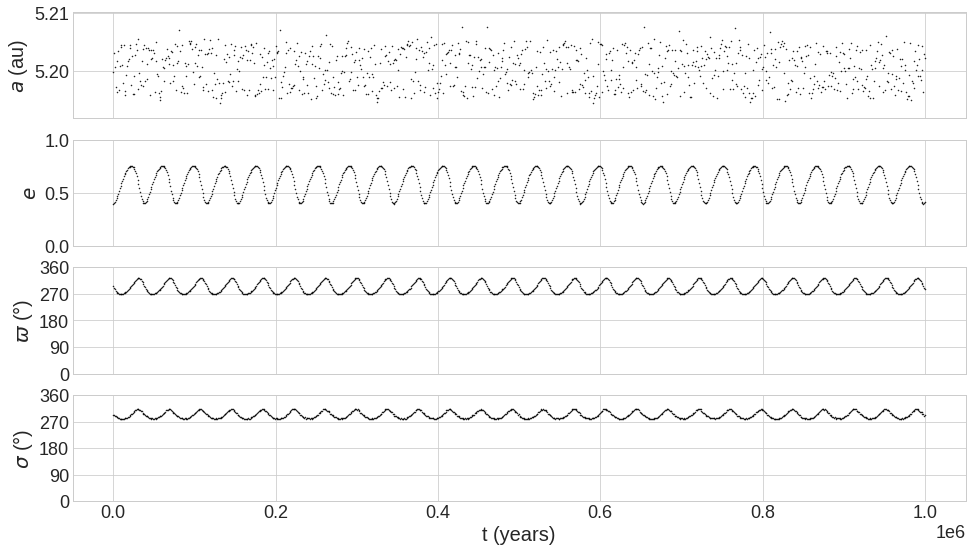

In [6]:
# GRÁFICOS PARTICULA
fig, axs = plt.subplots(4, 1, figsize = (16, 9), sharex = 'col', sharey = False)

# Gráficos: a(t), e(t) y ángulos(t).
axs[0].plot(t, a, 's', marker = '.', ms = 1, c='k')
axs[1].plot(t, e, 's', marker = '.', ms = 1, c='k')
axs[2].plot(t, w, 's', marker = '.', ms = 1, c='k')
axs[3].plot(t, s, 's', marker = '.', ms = 1, c='k')

# Labels y ticks:
axs[0].set(ylabel = '$a$ (au)', ylim = [0.9995*min(a), 1.0005*max(a)])
axs[1].set(ylabel = '$e$', ylim = [0, 1], yticks = [0, 0.5 ,1])
axs[2].set(ylabel = r'$\varpi$ (°)', yticks = angle_yticks)
axs[3].set(ylabel = r'$\sigma$ (°)', xlabel = 't (years)', yticks = angle_yticks);

if (SAVE_plot):
    if not os.path.exists(dir_plot):
        os.makedirs(dir_plot)
    plt.savefig(dir_plot + file_plot1, bbox_inches = 'tight', dpi = int(cal), format = formato);  
    print('Saved in:', dir_plot + file_plot1)

plt.show();

/tmp/ipykernel_31936/1141890892.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[0].plot(tp, ap, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/1141890892.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[1].plot(tp, ep, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/1141890892.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[2].plot(tp, wp, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/1141890892.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[3].plot(tp, sp, 's', marker = '.', ms 

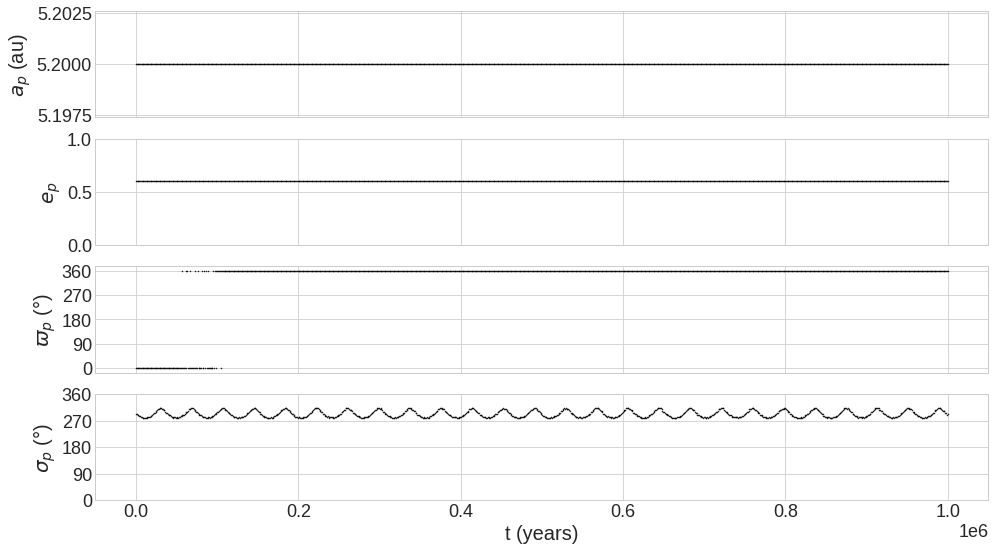

In [7]:
# GRÁFICOS PLANETA
fig, axs = plt.subplots(4, 1, figsize = (16, 9), sharex = 'col', sharey = False)

# Gráficos: a(t), e(t) y ángulos(t).
axs[0].plot(tp, ap, 's', marker = '.', ms = 1, c='k')
axs[1].plot(tp, ep, 's', marker = '.', ms = 1, c='k')
axs[2].plot(tp, wp, 's', marker = '.', ms = 1, c='k')
axs[3].plot(tp, sp, 's', marker = '.', ms = 1, c='k')

# Labels y ticks:
axs[0].set(ylabel = '$a_p$ (au)', ylim = [0.9995*min(ap), 1.0005*max(ap)])
axs[1].set(ylabel = '$e_p$', ylim = [0, 1], yticks = [0, 0.5 ,1])
axs[2].set(ylabel = r'$\varpi_p$ (°)', yticks = angle_yticks)
axs[3].set(ylabel = r'$\sigma_p$ (°)', xlabel = 't (years)', yticks = angle_yticks);

if (SAVE_plot):
    plt.savefig(dir_plot + file_plot2, bbox_inches = 'tight', dpi = int(cal), format = formato);  
    print('Saved in:', dir_plot + file_plot2)

plt.show();

/tmp/ipykernel_31936/3324462716.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[0].plot(t, deltaW, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/3324462716.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[1].plot(t, theta, 's', marker = '.', ms = 1, c='k')
/tmp/ipykernel_31936/3324462716.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  axs[2].plot(t, ds, 's', marker = '.', ms = 1, c='k')


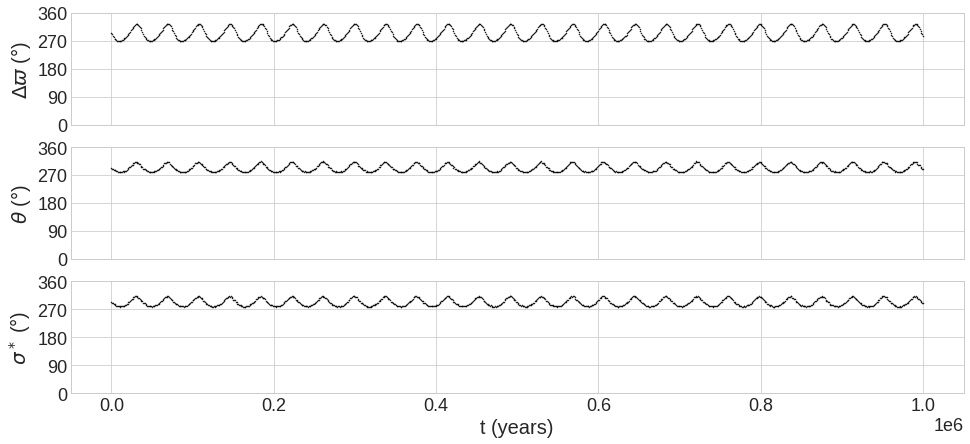

In [8]:
# OTROS GRÁFICOS
fig, axs = plt.subplots(3, 1, figsize = (16, 7), sharex = 'col', sharey = False)

# Gráficos: a(t), e(t) y ángulos(t).
axs[0].plot(t, deltaW, 's', marker = '.', ms = 1, c='k')
axs[1].plot(t, theta, 's', marker = '.', ms = 1, c='k')
axs[2].plot(t, ds, 's', marker = '.', ms = 1, c='k')

# Labels y ticks:
axs[0].set(ylabel = r'$\Delta\varpi$ (°)', yticks = angle_yticks)
axs[1].set(ylabel = r'$\theta$ (°)', yticks = angle_yticks)
axs[2].set(ylabel = r'$\sigma^*$ (°)', xlabel = 't (years)', yticks = angle_yticks);

if (SAVE_plot):
    plt.savefig(dir_plot + file_plot3, bbox_inches = 'tight', dpi = int(cal), format = formato);  
    print('Saved in:', dir_plot + file_plot3)

plt.show();

In [9]:
if ((SAVE_data) and (MODO == 0)):
    if not os.path.exists(dir_data):
         os.makedirs(dir_data)
    formato = "%6.2f %8.6f %8.6f %5.2f %5.2f"
    nom_cols1 = "    t    a       e      w  lambda"
    nom_cols2 = "    tp    ap       ep      wp  lambdap"
    data1 = np.c_[t, a, e, w, l]
    data2 = np.c_[tp, ap, ep, wp, lp]
    np.savetxt(dir_data + file_data1, data1, fmt=formato, header = nom_cols1, comments='')
    np.savetxt(dir_data + file_data2, data2, fmt=formato, header = nom_cols2, comments='')
    print('Saved in:', dir_data)
        
# Para levantar en otro notebook:    
if (COMPARAR):
    %store e
    %store deltaW
    %store s
# del e 
# del deltaW 
# del s

Stored 'e' (ndarray)
Stored 'deltaW' (ndarray)
Stored 's' (ndarray)


In [10]:
# FIN DEL PROGRAMA